## Exploratory Data Analysis in Python

### Chapter 1: Getting to Know a Dataset

What's the best way to approach a new dataset? Learn to validate and summarize categorical and numerical  
data and create Seaborn visualizations to communicate your findings.

### 1.1 Initial exploration

Exploratory Data Analysis, or EDA, is the process of cleaning and reviewing data to...
* derive insights such as descriptive statistics and correlation
* generate hypothesis for experiments

#### A first look with `.head()`

In [1]:
import pandas as pd

books = pd.read_csv('datasets/clean_books.csv')
books.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens


#### Gathering more `.info()`

The `.info()` method offers a quick way to summarize the number of missing values in each column,  
the data type of each column, and memory usage.

In [2]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


#### A closer look at categorical columns

A common question about categorical columns in a dataset is how many data points we have in each  
category. For example, to find the number of books within each genre:

In [3]:
books.value_counts('genre')

genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64

#### `.describe()` numerical columns

To gain a quick understanding of data included in numerical columns:

In [4]:
books.describe()

,rating,year
count,350.000000,350.000000
mean,4.608571,2013.508571
std,0.226941,3.284711
min,3.300000,2009.000000
25%,4.500000,2010.000000
50%,4.600000,2013.000000
75%,4.800000,2016.000000
max,4.900000,2019.000000


#### Visualizing numerical data

Histograms are a classic way to look at the distribution of numerical data by splitting numerical  
values into discrete bins and visualizing the count of values in each bin.

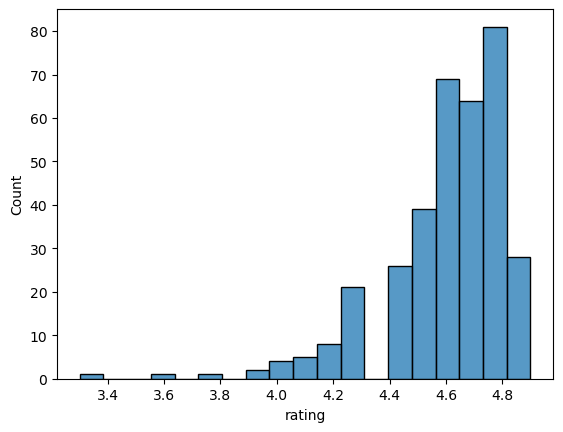

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.histplot(data=books, x='rating')
plt.show()


#### Adjusting bin width

Ideally, we would have a bin for each tenth of a rating. To set the bin width:

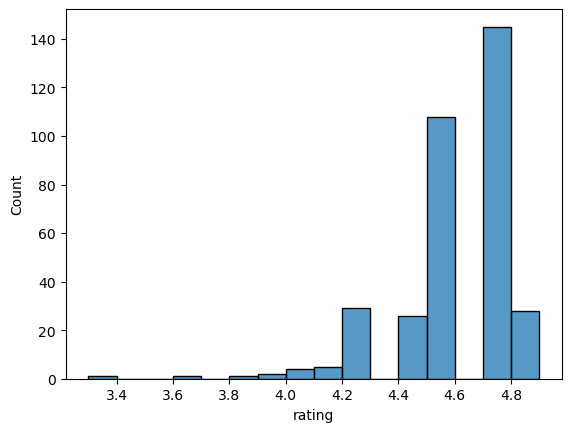

In [6]:
sns.histplot(data=books, x='rating', binwidth=0.1)
plt.show()

### 1.2 Data validation

Data validation is an important early step in EDA. We want to understand whether data types and  
ranges are as expected before we progress too far in our analysis!

#### Validating data types

We can use the DataFrame `.dtypes` attribute if we're only interested in data types.

In [7]:
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

#### Updating data types

The `astype()` function allows us to change data types.

In [8]:
# Change data type of year column to float
books['year'] = books['year'].astype(float)
books.dtypes

name       object
author     object
rating    float64
year      float64
genre      object
dtype: object

In [9]:
# Revert data type of year column to integer
books['year'] = books['year'].astype(int)
books.dtypes

name       object
author     object
rating    float64
year        int32
genre      object
dtype: object

#### Updating data types

Common programming data types as well as their Python names are listed here. It's the Python name that  
we pass to the `astype()` function.

| **Type**   | **Python Name** |
|------------|-----------------|
| String     | `str`           |
| Integer    | `int`           |
| Float      | `float`         |
| Dictionary | `dict`          |
| List       | `list`          |
| Boolean    | `bool`          |

#### Validating categorical data

We can validate categorical data by comparing values in a column to a list of expected values using  
`.isin()`, which can either be applied to a Series or to an entire DataFrame.

In [10]:
books['genre'].isin(['Fiction', 'Non Fiction'])

0       True
1       True
2       True
3       True
4      False
       ...  
345     True
346     True
347     True
348     True
349    False
Name: genre, Length: 350, dtype: bool

Use the tilde operator at the beginning of the code block to invert the True/False values.

In [11]:
~books['genre'].isin(['Fiction', 'Non Fiction'])

0      False
1      False
2      False
3      False
4       True
       ...  
345    False
346    False
347    False
348    False
349     True
Name: genre, Length: 350, dtype: bool

To filter the DataFrame for only values that are in our list:

In [12]:
books[books['genre'].isin(['Fiction', 'Non Fiction'])].head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,2011,Fiction


#### Validating numerical data

To view only the numerical columns in a DataFrame:

In [13]:
books.select_dtypes('number').head()

,rating,year
0,4.7,2016
1,4.6,2011
2,4.7,2018
3,4.7,2017
4,4.8,2019


To know the range of range of years in which the books were published:

In [14]:
books['year'].min()

2009

In [15]:
books['year'].max()

2019

We can view a more detailed picture of the distribution of year data using Seaborn's boxplot function.

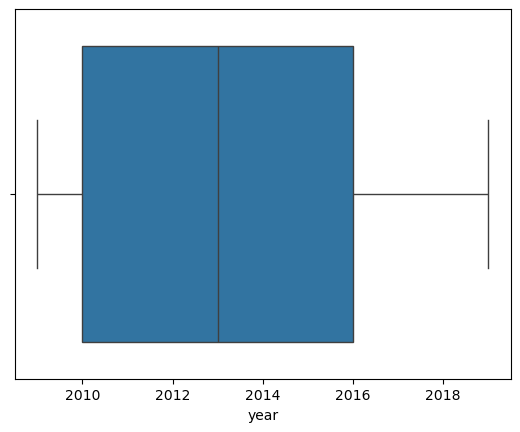

In [16]:
sns.boxplot(data=books, x='year')
plt.show()

The boxplot shows the boundaries of each quartile of year data: the lowest year is 2009 and the highest  
year is 2019. The 25th and 75th percentiles are 2010 and 2016 and the median year is 2013.

We can also view the year data grouped by a categorical variable such as genre by setting the y  
keyword argument:

<Axes: xlabel='year', ylabel='genre'>

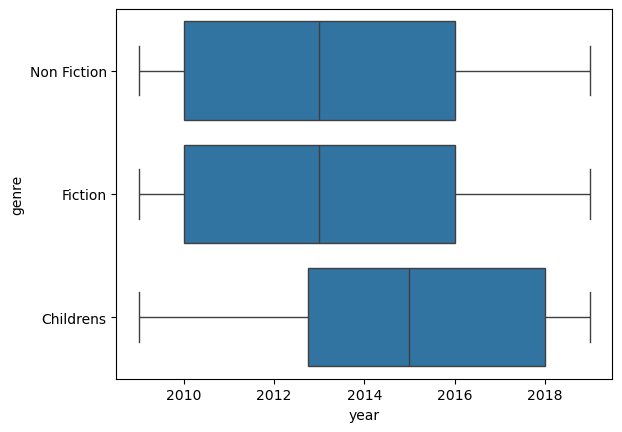

In [17]:
sns.boxplot(data=books, x='year', y='genre')

### 1.3 Data summarization

#### Exploring groups of data

* `groupby()` groups data by category
* Aggregating function indicates how to summarize grouped data

In [18]:
# Group by and count books in each genre
books.groupby('genre').count()

,name,author,rating,year
genre,,,,
Childrens,40,40,40,40
Fiction,131,131,131,131
Non Fiction,179,179,179,179


#### Aggregating functions

| Sum                | `.sum()`   |
|--------------------|------------|
| Count              | `.count()` |
| Minimum            | `.min()`   |
| Maximum            | `.max()`   |
| Variance           | `.var()`   |
| Standard Deviation | `.std()`   |

#### Aggregating ungrouped data

`.agg()` applies aggregating functions across a DataFrame and is typically used when we want to apply  
more than one function. By default, it aggregates across all rows in a given column.

In [19]:
books.agg(['min', 'max'])

,name,author,rating,year,genre
min,10-Day Green Smoothie Cleanse,Abraham Verghese,3.3,2009,Childrens
max,Wrecking Ball (Diary of a Wimpy Kid Book 14),Zhi Gang Sha,4.9,2019,Non Fiction


#### Specifying aggregations for columns

A dictionary can be used to specify which aggregation functions to apply to which columns.

In [20]:
books.agg({'rating' : ['min', 'max'], 'year' : ['median']})

,rating,year
min,3.3,NaN
max,4.9,NaN
median,NaN,2013.0


#### Named summary columns

We can create named columns with our desired aggregations by using the `.agg()` function and creating  
named tuples inside it. Each named tuple should include a column name followed by the aggregation  
function to apply to that column. The name of the tuple becomes the name of the resulting column.

In [21]:
books.groupby('genre').agg(
    min_rating = ('rating', 'min'),
    max_rating = ('rating', 'max'),
    median_year = ('year', 'median')
)

,min_rating,max_rating,median_year
genre,,,
Childrens,4.4,4.9,2015.0
Fiction,3.3,4.9,2013.0
Non Fiction,4.0,4.9,2013.0


#### Visualizing categorical summaries

In Seaborn, bar plots automatically calculate the mean of a quantitative variable. The bar plots also  
show a 95% confidence interval for the mean as a vertical line on the top of each bar. Since confidence  
intervals are calculated using both the number of values and the variability of values, they give a  
helpful indication of how much the data can be relied upon.

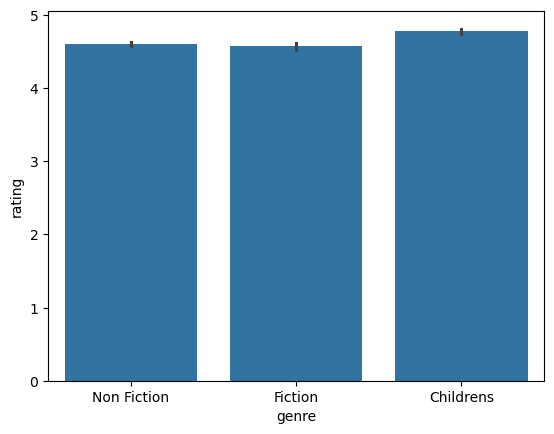

In [22]:
sns.barplot(data=books, x='genre', y='rating')
plt.show()

### Chapter 2: Data Cleaning and Imputation

Exploring and analyzing data often means dealing with missing values, incorrect data types, and outliers.  
In this chapter, you'll learn techniques to handle these issues and streamline your EDA processes!

### 2.1 Addressing missing data

#### Why is missing data a problem?
* Affects distributions
    * Example: Missing heights of taller students  

* Data is less representative of the underlying population
    * Certain groups disproportionately represented, e.g.,  
    lacking data on oldest students

* Can result in drawing incorrect conclusions

#### Checking for missing values

In [23]:
salaries = pd.read_csv('datasets/ds_salaries.csv')
salaries.isna().sum()

Working_Year            10
Designation             10
Experience              32
Employment_Status       35
Employee_Location        6
Company_Size            38
Remote_Working_Ratio    18
Salary_USD              51
dtype: int64

#### Strategies for addressing missing data

* Drop missing values
    * If missing values amount to 5% or less of total values

* Impute mean, median, mode
    * Depends on distribution and context

* Impute by sub-group
    * Example: Median salary varies by experience, so we could  
    impute different salaries depending on experience

#### Dropping missing values

To calculate the missing values threshold, multiply the length of the DataFrame by five percent.

In [24]:
# Calculate the missing values threshold
threshold = round(len(salaries) * 0.05)
threshold

30

In [25]:
# Filter for columns with missing values less than or equal to the threshold
cols_to_drop = salaries.columns[salaries.isna().sum() <= threshold]
cols_to_drop

Index(['Working_Year', 'Designation', 'Employee_Location',
       'Remote_Working_Ratio'],
      dtype='object')

In [26]:
# Drop missing values
salaries.dropna(subset=cols_to_drop, inplace=True)

In [27]:
# Check that missing values were dropped
salaries.isna().sum()

Working_Year             0
Designation              0
Experience              19
Employment_Status       24
Employee_Location        0
Company_Size            27
Remote_Working_Ratio     0
Salary_USD              40
dtype: int64

#### Imputing a summary statistic   

In [28]:
# Filter for the remaining columns with missing values
cols_with_missing_values = salaries.columns[salaries.isna().sum() > 0]
cols_with_missing_values

Index(['Experience', 'Employment_Status', 'Company_Size', 'Salary_USD'], dtype='object')

To impute the mode for the first three columns, we loop through them and call the `.fillna()` method,  
passing the respective column's mode and indexing the first item, which contains the mode, in  
square brackets.

In [29]:
# Impute the mode for the first three columns
for col in cols_with_missing_values[:-1]:
    salaries.fillna({col: salaries[col].mode()[0]}, inplace=True)

#### Checking the remaining missing values

In [30]:
# Check for missing values again
salaries.isna().sum()

Working_Year             0
Designation              0
Experience               0
Employment_Status        0
Employee_Location        0
Company_Size             0
Remote_Working_Ratio     0
Salary_USD              40
dtype: int64

#### Imputing by sub-group

Impute median salary by experience level by grouping salaries by experience and calculating the median.  
Store the grouped data as a dictionary using the `to_dict()` method.

In [31]:
# Impute median salary by experience level
salaries_dict = salaries.groupby('Experience')['Salary_USD'].median().to_dict()
salaries_dict

{'Entry': 55397.0, 'Executive': 163694.5, 'Mid': 73465.0, 'Senior': 130628.0}

In [32]:
# Map the dictionary to missing values of Salary_USD
salaries['Salary_USD'] = salaries['Salary_USD'].fillna(salaries['Experience'].map(salaries_dict))

#### No more missing values!

In [33]:
# Final check for missing values
salaries.isna().sum()

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64

### 2.2 Converting and analyzing categorical data

#### Previewing the data

In [34]:
import pandas as pd

salaries = pd.read_csv('datasets/ds_salaries_clean.csv')

In [35]:
# Filter and preview non-numeric data
salaries.select_dtypes('object').head()

,Designation,Experience,Employment_Status,Employee_Location,Company_Size
0,Data Scientist,Mid,FT,DE,L
1,Machine Learning Scientist,Senior,FT,JP,S
2,Big Data Engineer,Senior,FT,GB,M
3,Product Data Analyst,Mid,FT,HN,S
4,Machine Learning Engineer,Senior,FT,US,L


#### Job titles

In [36]:
# Frequency of values in the Designation column
salaries['Designation'].value_counts().head()

Designation
Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Name: count, dtype: int64

In [37]:
# Count the number of unique job titles
salaries['Designation'].nunique()

50

#### Extracting value from categories

* Current format of the data limits our ability to generate insights
* `pandas.Series.str.contains()` 
    * Search a column for a specific string or multiple strings
    * Returns True or False values

In [38]:
# Job titles that have Scientist in designation
salaries["Designation"].str.contains("Scientist")

0       True
1       True
2      False
3      False
4      False
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 607, dtype: bool

Finding multiple phrases in strings

* Words of interest: Machine Learning or AI
* Note: Avoid spaces before or after the pipe

In [39]:
# Return observations containing Machine Learning or AI
salaries['Designation'].str.contains('Machine Learning|AI')

0      False
1       True
2      False
3      False
4       True
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 607, dtype: bool

#### Finding multiple phrases in strings

* Words of interest: Any that start with Data
    * Include the `^` symbol to indicate we are looking   
    for this match at the start of the line

In [40]:
salaries['Designation'].str.contains('^Data')

0       True
1      False
2      False
3      False
4      False
       ...  
602     True
603     True
604     True
605     True
606    False
Name: Designation, Length: 607, dtype: bool

#### Finding multiple phrases in strings

Define a list of job titles we want to find:

In [41]:
# Create a list with the different categories of data roles
job_categories = ['Data Science', 'Data Analytics', 'Data Engineering',
                  'Machine Learning', 'Managerial', 'Consultant']

In [42]:
# Create variables containing our filters
data_science = 'Data Scientist|NLP'
data_analyst = 'Analyst|Analytics'
data_engineer = 'Data Engineer|ETL|Architect|Infrastructure'
ml_engineer = 'Machine Learning|ML|Big Data|AI'
manager = 'Manager|Head|Director|Lead|Pricipal|Staff'
consultant = 'Consultant|Freelance'

In [43]:
# Create a list with our range of conditions for the str.contains() method
conditions = [
    (salaries['Designation'].str.contains(data_science)),
    (salaries['Designation'].str.contains(data_analyst)),
    (salaries['Designation'].str.contains(data_engineer)),
    (salaries['Designation'].str.contains(ml_engineer)),
    (salaries['Designation'].str.contains(manager)),
    (salaries['Designation'].str.contains(consultant))
]

#### Creating the categorical column

Create a new `Job_Category` column using the `np.select()` function. It takes:
* a list of conditions as the first argument
* a list of arrays to search for the conditions in
* a default argument to assign 'Other' when a value in the conditions list  
is not found

In [44]:
import numpy as np
salaries['Job_Category'] = np.select(conditions,
                                     job_categories,
                                     default='Other')

#### Previewing job categories

In [45]:
salaries[['Designation', 'Job_Category']].head()

,Designation,Job_Category
0,Data Scientist,Data Science
1,Machine Learning Scientist,Machine Learning
2,Big Data Engineer,Data Engineering
3,Product Data Analyst,Data Analytics
4,Machine Learning Engineer,Machine Learning


#### Visualizing job category frequency

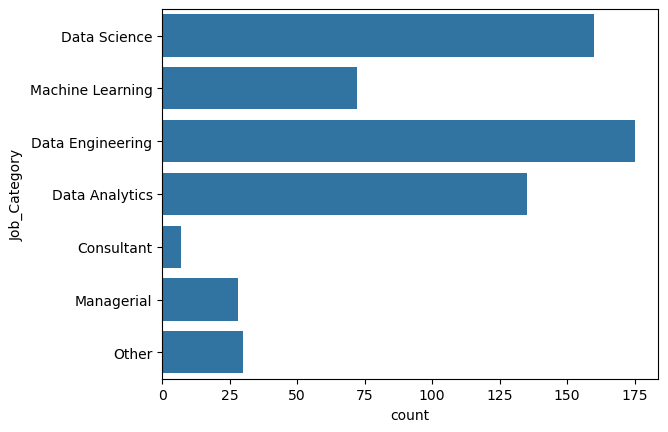

In [46]:
# Visualize how many jobs fall under each category
sns.countplot(data=salaries, y="Job_Category")
plt.show()

### 2.3 Working with numeric data

#### The original salaries dataset

This dataset has a column called Salary_In_Rupees. The values contain commas, and the data type is  
object.

In [47]:
salaries = pd.read_csv('datasets/ds_salaries_rupees.csv', index_col=0)
salaries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 1 to 607
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Working_Year          607 non-null    int64 
 1   Designation           607 non-null    object
 2   Experience            607 non-null    object
 3   Employment_Status     607 non-null    object
 4   Salary_In_Rupees      607 non-null    object
 5   Employee_Location     607 non-null    object
 6   Company_Location      607 non-null    object
 7   Company_Size          607 non-null    object
 8   Remote_Working_Ratio  607 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 47.4+ KB


In [48]:
# Preview salary column
salaries['Salary_In_Rupees'].head()

1     6,352,272.00
2    20,688,070.00
3     8,674,985.00
4     1,591,390.00
5    11,935,425.00
Name: Salary_In_Rupees, dtype: object

#### Converting strings to numbers

* Remove comma values in `Salary_In_Rupees`
    * `pd.Series.str.replace('characters to remove', 'characters to replace them with')`

* Convert the column to `float` data type

* Create a new column by converting the currency

In [49]:
# Remove comma values
salaries['Salary_In_Rupees'] = salaries['Salary_In_Rupees'].str.replace(',', '')
salaries['Salary_In_Rupees'].head(3)

1     6352272.00
2    20688070.00
3     8674985.00
Name: Salary_In_Rupees, dtype: object

#### Converting strings to numbers

In [50]:
# Convert data type to float
salaries['Salary_In_Rupees'] = salaries['Salary_In_Rupees'].astype(float)
salaries['Salary_In_Rupees'].head(3)

1     6352272.0
2    20688070.0
3     8674985.0
Name: Salary_In_Rupees, dtype: float64

Conversion rate 1 Indian Rupee = 0.012 US Dollars


In [51]:
# Create 'Salary_USD' column
salaries['Salary_USD'] = salaries['Salary_In_Rupees'] * 0.012

In [52]:
# Preview the new column
salaries[['Salary_In_Rupees', 'Salary_USD']].head()

,Salary_In_Rupees,Salary_USD
1,6352272.0,76227.264
2,20688070.0,248256.840
3,8674985.0,104099.820
4,1591390.0,19096.680
5,11935425.0,143225.100


#### Adding summary statistics into a DataFrame

Create a new column containing the standard deviation of Salary_USD, where values are conditional  
based on the Experience column.

In [53]:
salaries['std_dev'] = salaries.groupby('Experience')['Salary_USD'].transform(lambda x: x.std())
salaries[['Experience', 'std_dev']].head()

,Experience,std_dev
1,MI,61014.902676
2,SE,55086.262290
3,SE,55086.262290
4,MI,61014.902676
5,SE,55086.262290


In [54]:
# Print the combinations of values for the chosen columns
salaries[['Experience', 'std_dev']].value_counts()

Experience  std_dev      
SE          55086.262290     280
MI          61014.902676     213
EN          42390.372790      88
EX          111783.615565     26
Name: count, dtype: int64

Unsurprisingly, there appears to be a larger variation in salary associated with the most senior role,  
Executive (EX).

#### Adding summary statistics into a DataFrame

We can repeat the process for other summary statistics, for example, the median salary based on  
company size. The preview shows that medium-sized companies have the largest median salary.

In [55]:
salaries['median_by_company_size'] = salaries.groupby('Company_Size')\
                                        ['Salary_USD'].transform(lambda x: x.median())

# Preview the two columns
salaries[['Company_Size', 'median_by_company_size']].head()

,Company_Size,median_by_company_size
1,L,95483.400
2,S,62064.216
3,M,108075.756
4,S,62064.216
5,L,95483.400


### 2.4 Handling Outliers

#### What is an outlier?

An outlier is an observation that is far away from other data points.

#### Using descriptive statistics

Pandas `.describe()` method can be used to identify outliers.

In [56]:
salaries['Salary_USD'].describe()

count       607.000000
mean     107225.825160
std       67752.404019
min        2729.868000
25%       59892.912000
50%       96982.488000
75%      143225.100000
max      572900.400000
Name: Salary_USD, dtype: float64

Here, the max salary in USD is more than the mean and median and is likely an outlier.

#### Using the interquartile range

Outliers can be defined mathematically using the interquartile range (IQR).

* IQR = 75th - 25th percentile

* Upper outliers > 75th percentile + (1.5 * IQR)
* Lower outliers < 25th percentile - (1.5 * IQR)

#### IQR in box plots

The box plot contains percentiles, and observations considered to be outliers are represented by   
points outside of the box.

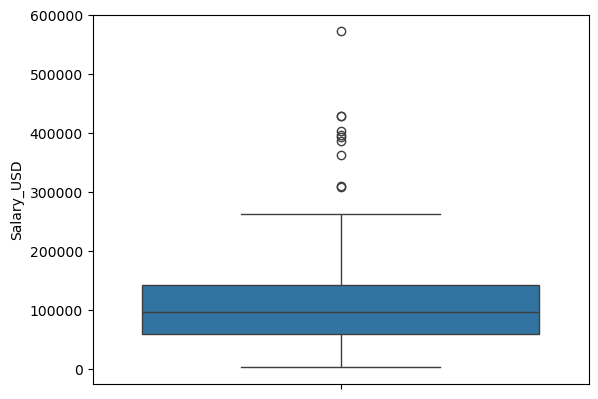

In [57]:
sns.boxplot(data=salaries, y='Salary_USD')
plt.show()

#### Identifying thresholds

Using the `.quantile()` method

In [58]:
# Calculate the 75th percentile
seventy_fifth = salaries['Salary_USD'].quantile(0.75)

# Calculate the 25th percentile
twenty_fifth = salaries['Salary_USD'].quantile(0.25)

# Calculate the IQR
salaries_iqr = seventy_fifth - twenty_fifth

salaries_iqr

83332.188

#### Identifying outliers

In [59]:
# Calculate the upper threshold
upper = seventy_fifth + (1.5 * salaries_iqr)

# Calculate the lower threshold
lower = twenty_fifth -(1.5 * salaries_iqr)

print(upper, lower)

268223.382 -65105.36999999999


#### Subsetting our data

The lower threshold is negative which isn't possible since we are working with salaries. Therefore  
subsetting our data will only return upper outliers

In [60]:
# Individuals with a salary above the upper threshold
salaries[(salaries['Salary_USD'] < lower) | (salaries['Salary_USD'] > upper)]\
    [['Experience', 'Employee_Location', 'Salary_USD']]

,Experience,Employee_Location,Salary_USD
26,EX,US,310321.056
34,MI,US,429675.300
64,SE,US,393391.608
98,MI,US,429675.300
158,MI,US,403894.788
226,EX,US,397210.944
253,EX,US,572900.400
483,EX,US,309366.216
520,SE,US,362836.920
524,SE,US,386707.776


#### Why look for outliers?

* Outliers are extreme values
    * may not accurately represent our data

* Can skew the mean and standard deviation

* Statistical tests and machine learning  
models need normally distributed data

#### What to do about outliers?

**Questions to ask:**
* Why do these outliers exist?
    * More senior roles / different countries pay more
    * Consider leaving them in the dataset

* Is the database accurate?
    * Could there have been an error in data collection?
        * If so, remove them

#### Dropping outliers

In [61]:
# Drop outliers from the salaries dataset
no_outliers = salaries[(salaries['Salary_USD'] > lower) & (salaries['Salary_USD'] < upper)]

no_outliers['Salary_USD'].describe()

count       597.000000
mean     102328.468281
std       55910.798009
min        2729.868000
25%       59819.400000
50%       95483.400000
75%      141564.648000
max      263534.184000
Name: Salary_USD, dtype: float64

After dropping outliers, there are nine fewer values, a mean that is 5000 dollars less than before,  
a much lower maximum salary.

#### Distribution of salaries

Plot histograms to highlight the impact of removing outliers.

[Text(0.5, 1.0, 'Histogram of Salary ($) for Data Professionals')]

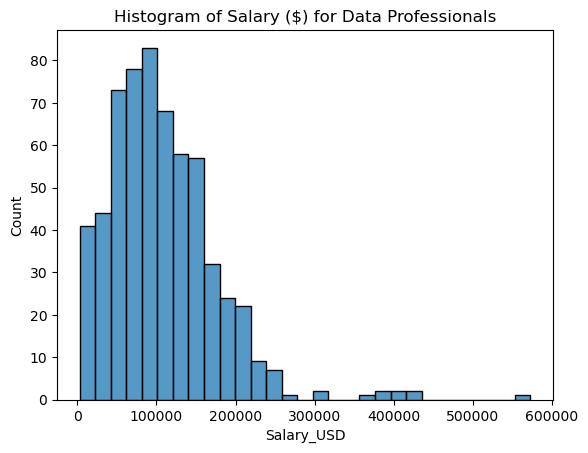

In [62]:
# Plot the salaries dataset containing outliers
sns.histplot(data=salaries, x='Salary_USD')\
    .set(title='Histogram of Salary ($) for Data Professionals')

[Text(0.5, 1.0, 'Histogram of Salary ($) for Data Professionals')]

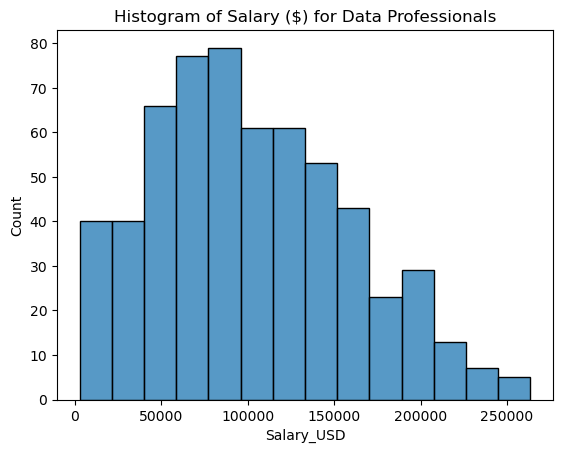

In [63]:
# Plot the salaries dataset without outliers
sns.histplot(data=no_outliers, x='Salary_USD')\
    .set(title='Histogram of Salary ($) for Data Professionals')

Plotting with the no_outliers dataset, salaries is not less skewed and looks more like a normal  
distribution.

## Chapter 3: Relationships in Data

Variables in datasets don't exist in a vacuum; they have relationships with each other. In this chapter,  
you'll look at relationships across numerical, categorical, and even DateTime data, exploring the   
direction and strength of these relationships as well as ways to visualize them.

#### 3.1 Patterns over time

The `divorce.csv` dataset describes Mexican marriages dissolved between 2000 and 2015. It  
contains columns for marriage date and marriage duration in years.

In [64]:
# Load the dataset
divorce = pd.read_csv('datasets/divorce.csv')
divorce.head(3)

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0


#### Importing DateTime data

When a CSV file is imported into pandas, date and time data are typically interpreted as strings.

In [65]:
print(divorce['marriage_date'].dtypes)

object


* DateTime data needs to be explicitly declared to Pandas

* Add the `parse_dates` keyword argument to the CSV import and set it   
equal to a list of column names that should be interpreted as DateTime data

In [66]:

divorce = pd.read_csv('datasets/divorce.csv', parse_dates=['marriage_date'])
print(divorce['marriage_date'].dtypes)

datetime64[ns]


#### Converting to DateTime data

* `pd.to_datetime()` converts arguments to DateTime data

In [67]:
divorce['marriage_date'] = pd.to_datetime(divorce['marriage_date'])
print(divorce['marriage_date'].dtypes)

datetime64[ns]


#### Creating DateTime data

* `pd.to_datetime()` can be used to combine date values stored in separate columns into a single  
DateTime value

* **Note:** columns must be named `day`, `month`, `year`, but can appear in any order

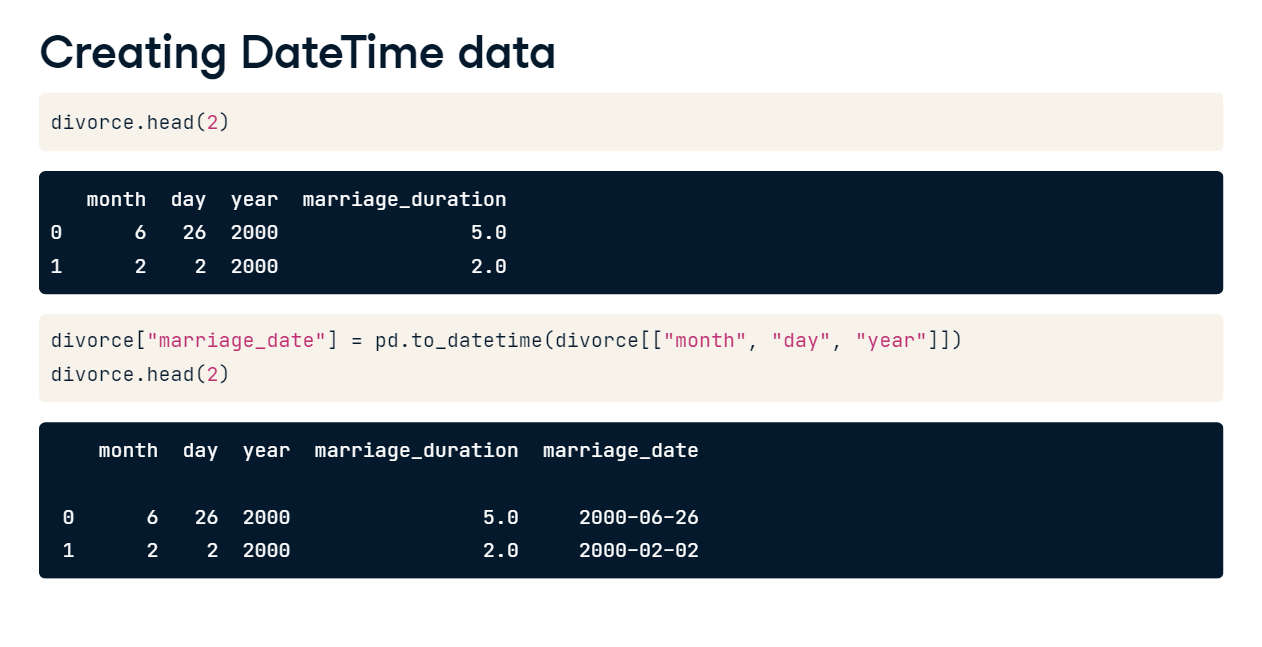

* Extract parts of a full date using `dt.day`, `dt.month`, `dt.year` attributes

In [68]:
# Extract the month data
divorce['marriage_month'] = divorce['marriage_date'].dt.month
divorce[['marriage_date', 'marriage_month']].head(3)

,marriage_date,marriage_month
0,2000-06-26,6
1,2001-09-02,9
2,2000-02-02,2


#### Visualizing patterns over time

In Seaborn, line plots aggregate y values at each value of x and show the estimated mean and a confidence  
interval for that estimate.

To check whether there is any relationship between the month that a now-divorced couple got married and  
the length of their marriage:

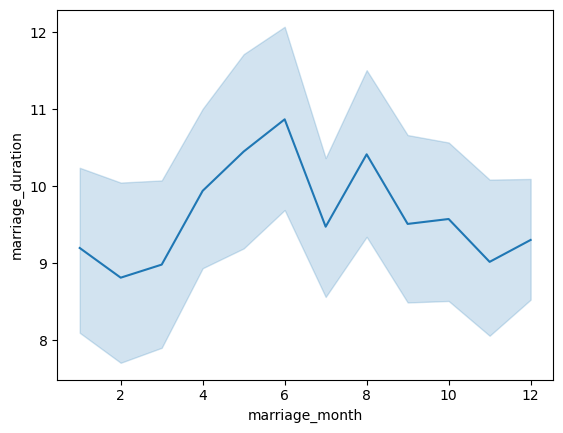

In [69]:
sns.lineplot(data=divorce, x='marriage_month', y='marriage_duration')
plt.show()

The results show some variation in mean marriage duration between months. The blue line represents

the mean marriage duration for our dataset, while the confidence intervals in the lighter blue shading

indicate the area that, with 95% probability, the population mean duration could fall between. The wide 

confidence intervals suggest that further analysis is needed.  

### 3.2 Correlation

#### Correlation

* Describes direction and strength of relationship between two variables

* Can help us use variables to predict future outcomes

* Panda's `.corr()` calculates the Pearson correlation coefficient,  
measuring the linear relationship between two variables

[![Screenshot 2024-01-10 134950.png](<attachment:Screenshot 2024-01-10 134950.png>)](https://www.scribbr.com/statistics/pearson-correlation-coefficient)
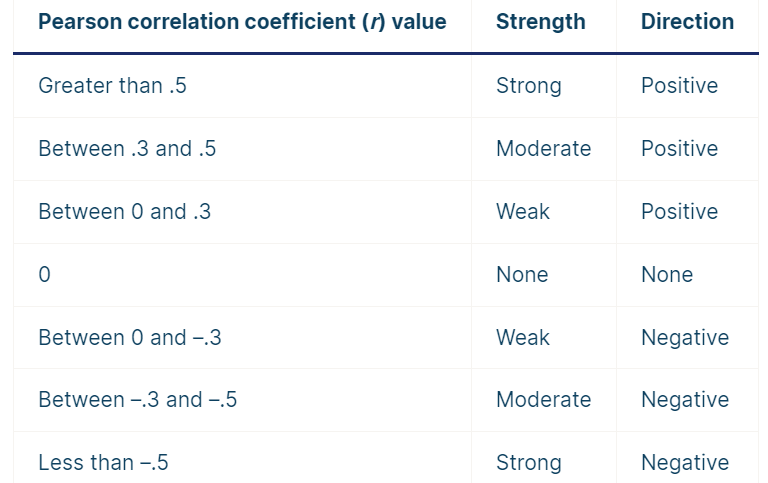

In [70]:
divorce.corr(numeric_only=True)

,income_man,income_woman,marriage_duration,num_kids,marriage_month
income_man,1.000000,0.318047,0.085321,0.040848,0.013652
income_woman,0.318047,1.000000,0.078677,-0.018015,0.041441
marriage_duration,0.085321,0.078677,1.000000,0.447358,0.001433
num_kids,0.040848,-0.018015,0.447358,1.000000,-0.000551
marriage_month,0.013652,0.041441,0.001433,-0.000551,1.000000


#### Correlation heatmaps

A heatmap has the benefit of color coding so that strong positive and negative correlations, represented  
in deep purple and beige respectively, are easier to spot. Setting the `annot` argument to True labels  
the correlation coefficient inside each cell.

<Axes: >

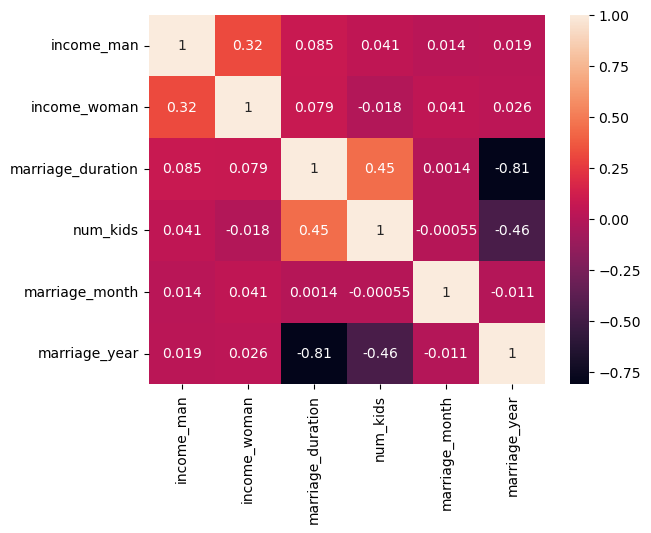

In [71]:
# Delete marriage_month column
divorce.drop(['marriage_month'], axis=1)

# Add marriage_year column
divorce['marriage_year'] = divorce['marriage_date'].dt.year

# Plot heatmap
sns.heatmap(divorce.corr(numeric_only=True), annot=True)

The heatmap shows that marriage year and marriage duration are strongly negatively correlated; in our  
dataset, marriages in later years are typically shorter.

**Note of caution:** Correlation must always be interpreted within the context of our data!  

Since our dataset is about marriages that ended between 2000 and 2015, marriages that started in earlier   
years will by definition have a longer duration than those that started in later ones.

#### Visualizing relationships

The Pearson coefficient only describes the linear correlation between variables. Variables can have a strong 

non-linear relationship (shown in the following plots) and a Pearson correlation coefficient of close to zero.

![Screenshot 2024-01-10 164250.png](<attachment:Screenshot 2024-01-10 164250.png>)
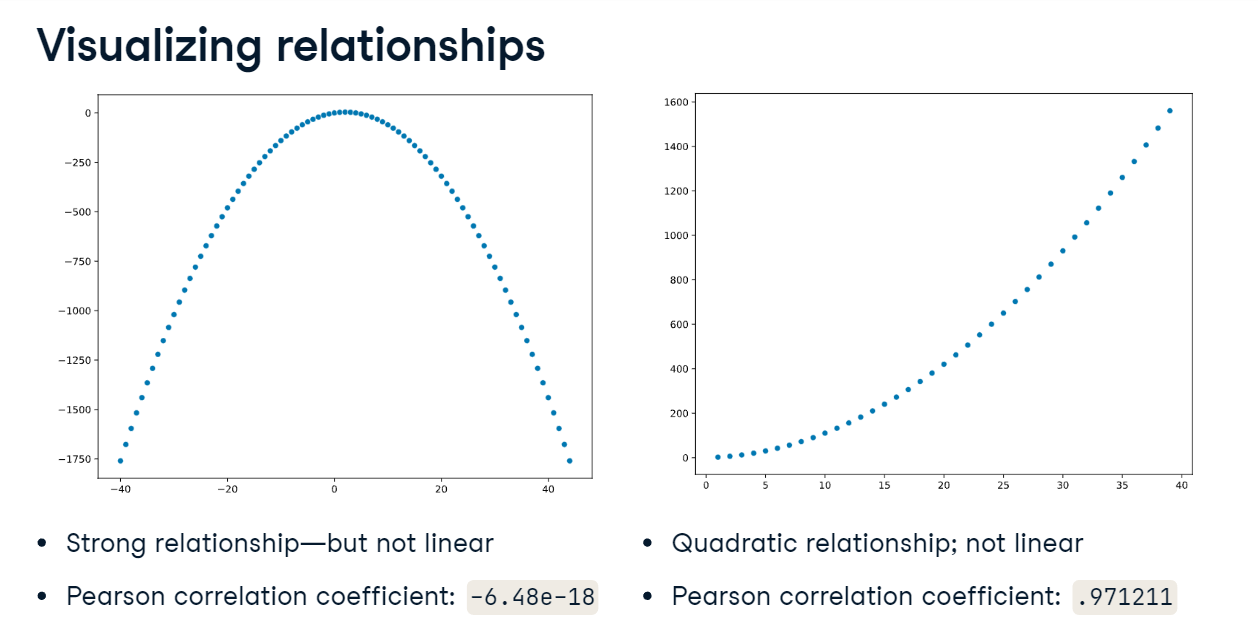

This is why it's important to complement our correlation calculations with scatter plots.

#### Scatter plots

To check that the correlation coeffcient of `0.32` correctly indicates a small positive relationship between  
the income of the male and female partners at the time of divorce:

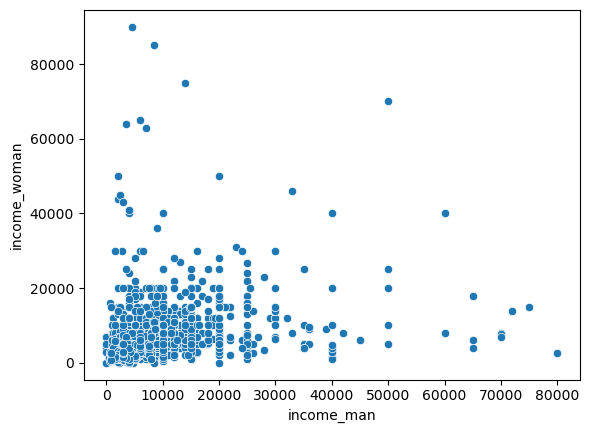

In [72]:
sns.scatterplot(data=divorce, x='income_man', y='income_woman')
plt.show()

The scatter plot shows that a relationship exists but is not particularly strong, just as the heatmap  
suggested.

#### Pairplots

When passed a DataFrame, pairplot plots all pairwise relationships between numerical variables in one  
visualization. The diagonal from upper left to lower right shows the distribution of each variable's  
observations.

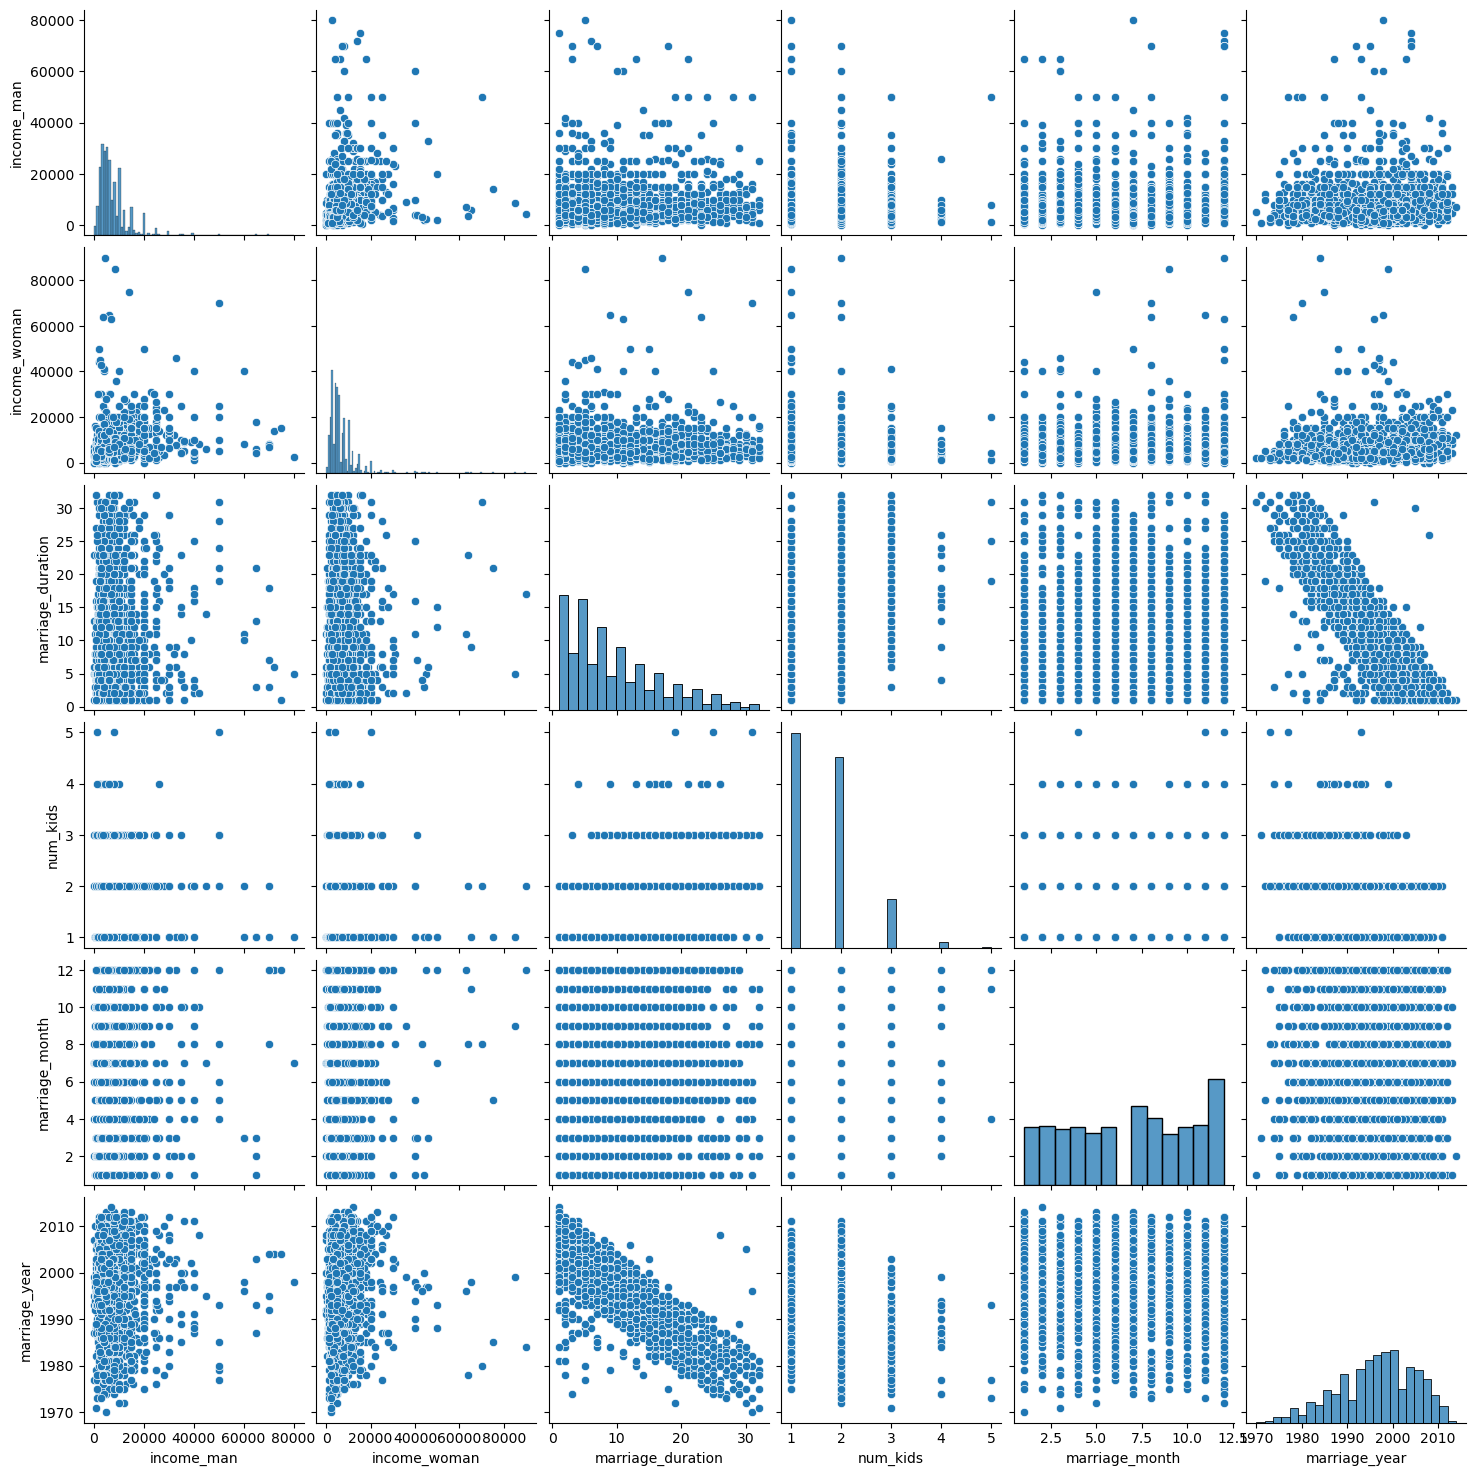

In [73]:
sns.pairplot(divorce)
plt.show()

Limit the number of plotted relationships by setting the `vars` argument equal to the variables of 
 
interest. The visuals confirm the validity of our correlation coefficients. Also, in the lower right plot  

we see that the distribution of marriage durations include many shorter marriages and fewer longer  

marriages.

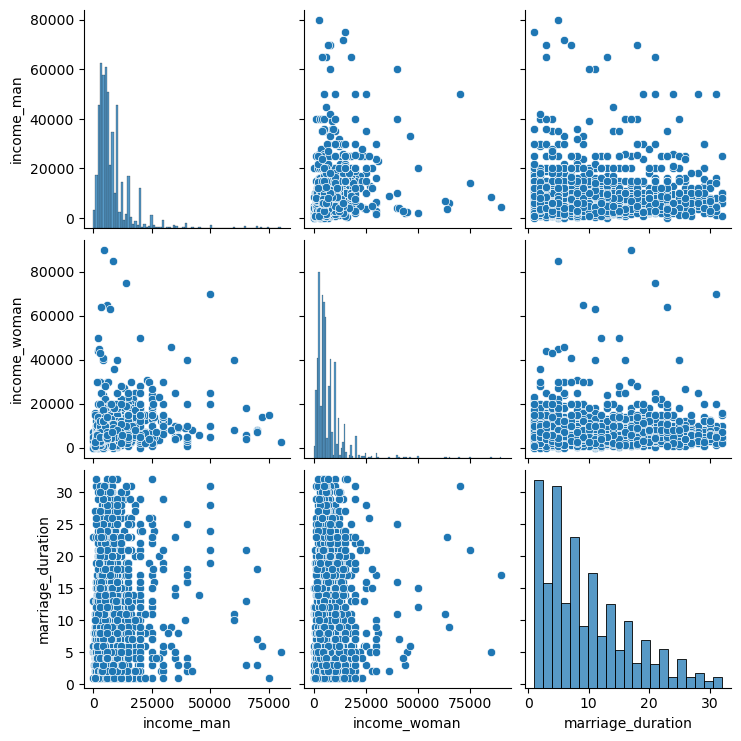

In [74]:
sns.pairplot(data=divorce, vars=['income_man', 'income_woman', 'marriage_duration'])
plt.show()

### 3.3 Factor relationships and distributions

Categorical variables, or factors, also have relationships

#### Level of education: male partner

Most men have an education level between primary and professional.

In [75]:
divorce['education_man'].value_counts()

education_man
Professional    1313
Preparatory      501
Secondary        288
Primary          100
Other              3
Name: count, dtype: int64

#### Exploring categorical relationships

Categorical variables are harder to summarize numerically, so we often rely on visualizations to explore  
their relationships.

To explore the relationship between marriage duration and the education level of the man in the dissolved  
marriage:

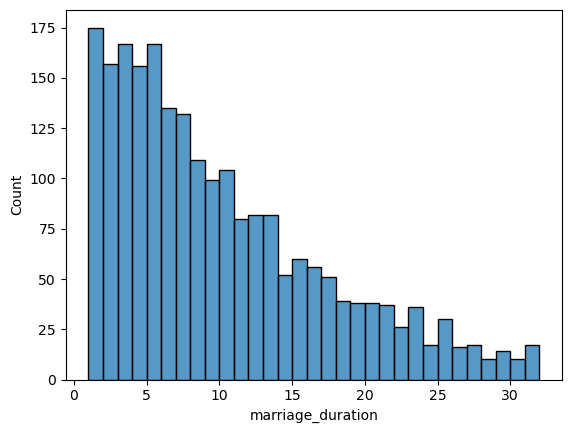

In [76]:
sns.histplot(data=divorce, x='marriage_duration', binwidth=1)
plt.show()

then layer in the information on male education level:

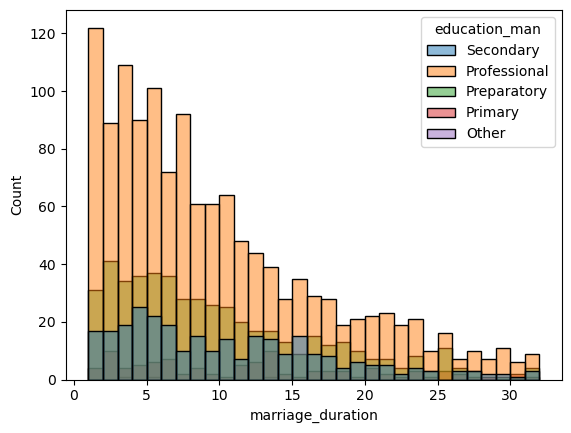

In [77]:
sns.histplot(data=divorce, x='marriage_duration', hue='education_man', binwidth=1)
plt.show()

However, because the education levels are stacked on top of each other, the relationship between  
marriage duration and male education is not clear.

#### Kernel Density Estimate (KDE) plots

KDE plots address this issue:

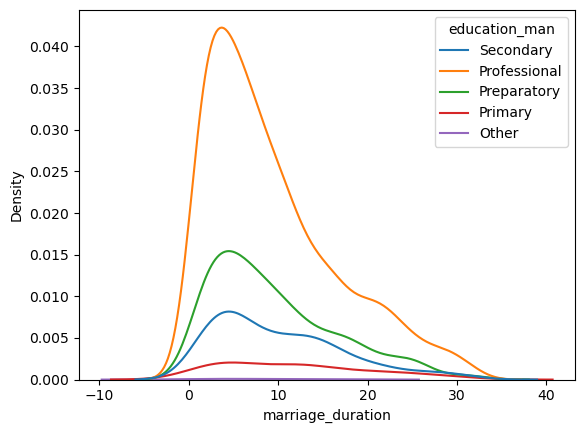

In [78]:
sns.kdeplot(data=divorce, x='marriage_duration', hue='education_man')
plt.show()

KDEs are more interpretable, especially when multiple distributions are shown. The location of the peak  
marriage duration for each level of the male partner's education is more identifiable than it was in the  
histogram.

However, due to the smoothing algorithm used in KDE plots, the curve can include values that don't make  
sense, so it's important to set good smoothing parameters. For example, zooming in on the KDE plot, the  
distribution suggests that some couples had marriage durations of less than zero, which is impossible.

![KDE plot.png](<attachment:KDE plot.png>)
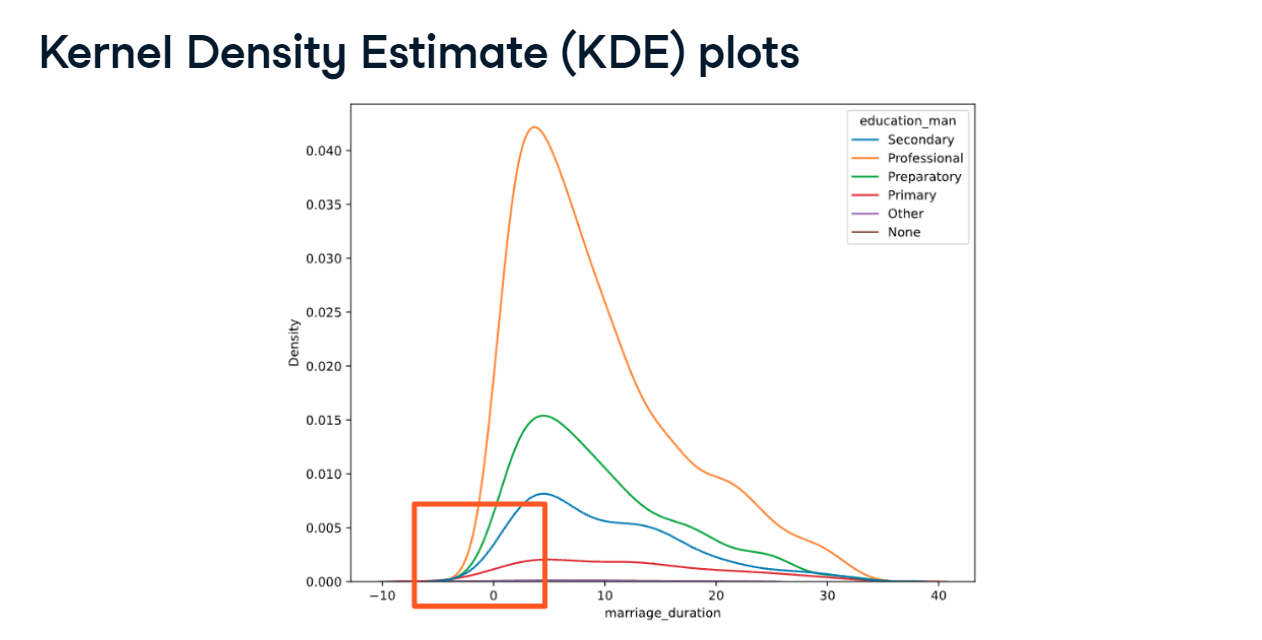

The `cut` argument tells Seaborn how far past the minimum and maximum data values the curve should go  
when smoothing is applied. When `cut` is set to `zero`, the curve will be limited to values between the  
minimum and maximum `x` values.

The plot now shows only marriage durations greater than or equal to one year, the shortest marriage  
duration in the dataset.

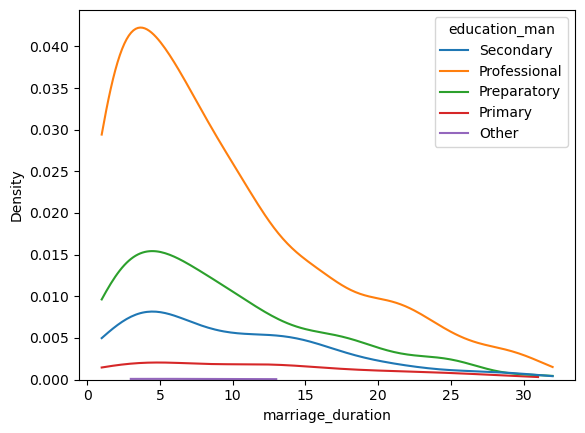

In [79]:
sns.kdeplot(data=divorce, x='marriage_duration', hue='education_man', cut=0)
plt.show()

#### Cumulative KDE plots

The cumulative KDE plot (set `cumulative=True`) describes the probability that marriage duration is less   
than or equal to the value on the x-axis for each level of male partner education.

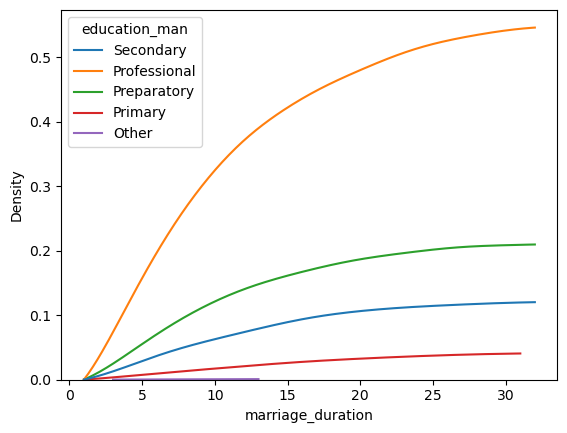

In [80]:
sns.kdeplot(data=divorce, x='marriage_duration', hue='education_man', cut=0, cumulative=True)
plt.show()

#### Relationship between age and education

* Is there a relationship between age at marriage and education level?

In [81]:
# Change column data type
divorce['dob_man'] = pd.to_datetime(divorce['dob_man'])
divorce['dob_woman'] = pd.to_datetime(divorce['dob_woman'])

In [82]:
# Create new columns
divorce['man_age_marriage'] = divorce['marriage_year'] - divorce['dob_man'].dt.year
divorce['woman_age_marriage'] = divorce['marriage_year'] - divorce['dob_woman'].dt.year

Create a scatterplot using these variables on the x and y-axis:

#### Scatter plot with categorical variables

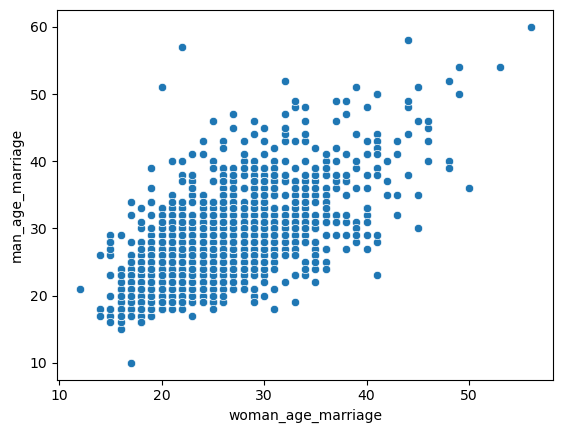

In [83]:
sns.scatterplot(data=divorce, x='woman_age_marriage', y='man_age_marriage')
plt.show()

There is a positive correlation between the variables. But, since the x and y values in scatter plots  
be numerical, how do we introduce education level into our visual?

The `hue` argument assigns a colour to each data point based on values in a given column. Set hue equal  
to `education_man`. The results suggest that men with a professional education level, represented with  
orange dots, may tend to get married later.

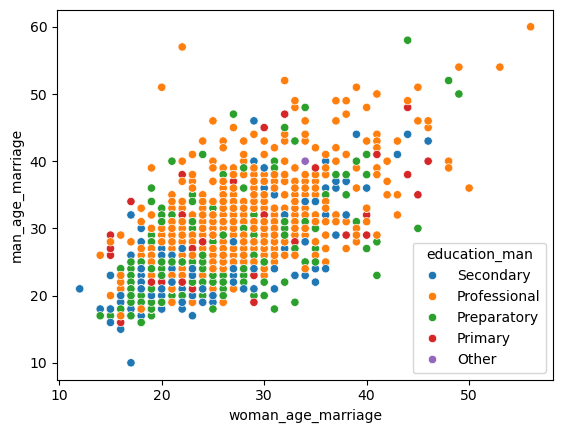

In [84]:
sns.scatterplot(data=divorce,
                x='woman_age_marriage',
                y='man_age_marriage',
                hue='education_man')
plt.show()

## Chapter 4: Turning Exploratory Analysis into Action

It's time to learn techniques and considerations you can use to successfully move forward with your  
projects after you've finished exploratory data analysis.

### 4.1 Considerations for categorical data

#### Why perform EDA?

* Detecting patterns and relationships

* Generating questions, or **hypotheses**

* Preparing data for machine learning

#### Representative data

* Data collected must be representative of the population we wish to study

    * For example, to analyze the relationship between education level and income  
    in the USA, we need to collect this data from adults residing in the USA

#### Categorical classes

When collecting categorical data, an important consideration is about the representation of classes (or labels).  

For example, when collecting data on people's attitudes to marriage, we find out their marital status,  
with classes including single, married, and divorced.

* Survey people's attitudes towards marriage
    * Marital status
        * Single
        * Married
        * Divorced



#### Class imbalance

When we perform EDA, we see an example of class imbalance, where one class occurs more frequently than 

others. As divorced people are more likely to have a negative view towards marriage, this can bias  

results, particularly if this class does not occur more frequently in the population.

![Screenshot 2024-01-12 190752.png](<attachment:Screenshot 2024-01-12 190752.png>)
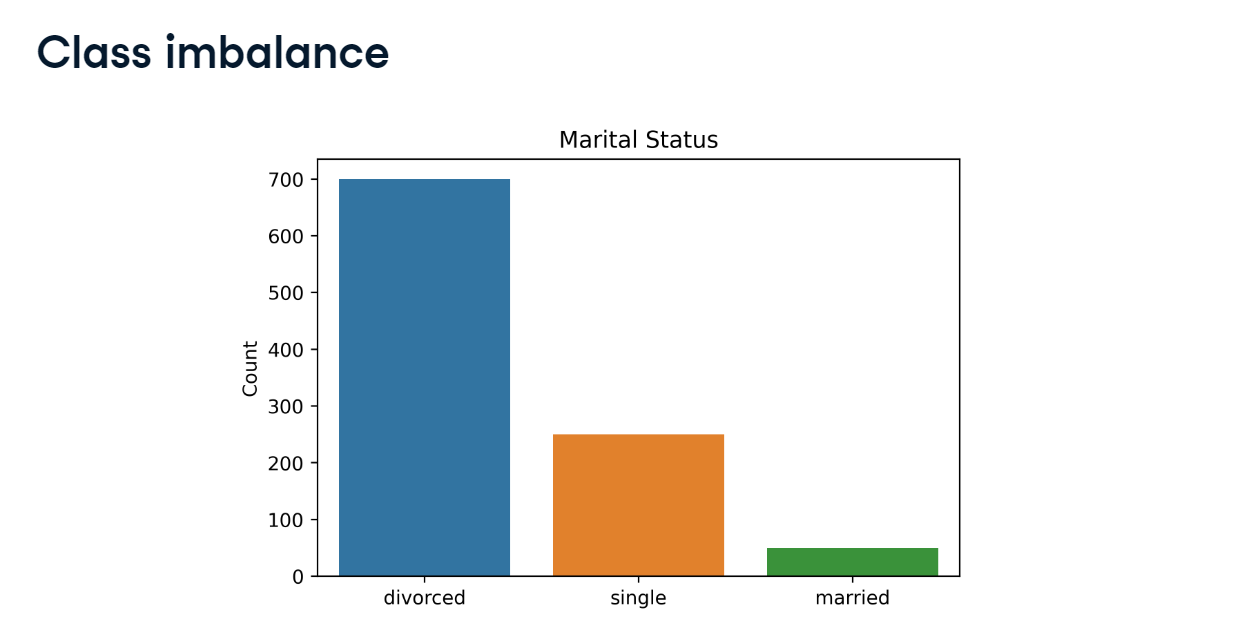

#### Relative Class frequency

* It is known that 40% of internal Indian flights have a destination of Delhi.  

However, a quick check shows that Delhi only represents 11.82% of destinations in our dataset. This   
suggests that our data is not representative of the population - in this case, internal flights in India.

In [85]:
planes = pd.read_csv('datasets/planes.csv')

# Return relative frequencies for each class
planes['Destination'].value_counts(normalize=True)

Destination
Cochin       0.425773
Banglore     0.268884
Delhi        0.118200
New Delhi    0.086105
Hyderabad    0.065257
Kolkata      0.035780
Name: proportion, dtype: float64

#### Cross-tabulation

Cross-tabulation enables us to examine the frequency of combinations of classes.

To look at flight route frequencies using the `pd.crosstab()` function. First, select the column to use as   
the index for the table. Next, pass the Destination. The values in the table are the count of the combined  
observations.

The most popular route is from Delhi to Cochin, with 4318 flights.

In [86]:
# Return a table of flight route frequencies
pd.crosstab(planes['Source'], planes['Destination'])

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,1199,0,0,868
Chennai,0,0,0,0,364,0
Delhi,0,4318,0,0,0,0
Kolkata,2720,0,0,0,0,0
Mumbai,0,0,0,662,0,0


#### Extending cross-tabulation

The following table shows the median price (INR) for domestic routes in India. We can calculate the
  
median price for these routes in our DataFrame, and compare the difference to these expected values.

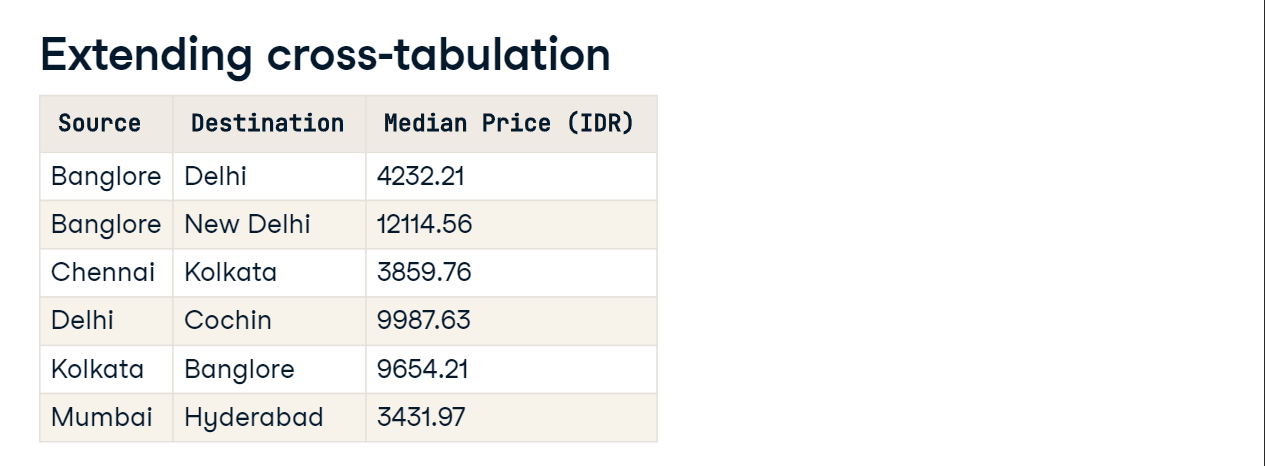

In [87]:
# Return aggregated values with pd.crosstab()
pd.crosstab(planes['Source'], 
            planes['Destination'],
            values=planes['Price'],
            aggfunc='median')

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,NaN,NaN,4823.0,NaN,NaN,10976.5
Chennai,NaN,NaN,NaN,NaN,3850.0,NaN
Delhi,NaN,10262.0,NaN,NaN,NaN,NaN
Kolkata,9345.0,NaN,NaN,NaN,NaN,NaN
Mumbai,NaN,NaN,NaN,3342.0,NaN,NaN


#### Comparing the sample to the population

Most prices are similar to the expected values. However, routes from Bangalore to Delhi and New Delhi 

are more expensive in our dataset, suggesting they aren't representative of the population.

### 4.2 Generating new features

The format of our data can limit our ability to detect relationships or inhibit the potential performance  
of machine learning models. One method to overcome these issues is to generate new features from our data.

The BMI dataset has the following columns of data:  

**Gender:** Male / Female  
**Height:** in cm  
**Weight:** in kg  
**Index:** to classify BMI into categories  
0: extremely weak  
1: weak  
2: normal  
3: overweight  
4: obese  
5: extremely obese  

In [88]:
bmi = pd.read_csv('datasets/bmi.csv')
bmi.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


#### Viewing data types

In [89]:
bmi.dtypes

Gender    object
Height     int64
Weight     int64
Index      int64
dtype: object

#### BMI

To gain further insights from the dataset, create a BMI column

In [90]:
# Create a BMI column
bmi['BMI'] = round(bmi['Weight'] / (bmi['Height']/100)**2, 2)

In [91]:
bmi.head()

,Gender,Height,Weight,Index,BMI
0,Male,174,96,4,31.71
1,Male,189,87,2,24.36
2,Female,185,110,4,32.14
3,Female,195,104,3,27.35
4,Male,149,61,3,27.48


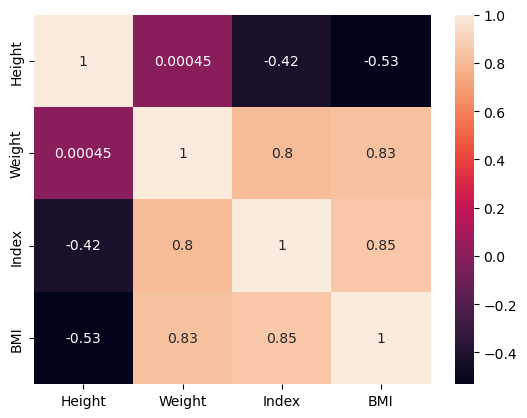

In [92]:
# Return correlation between numeric variables
sns.heatmap(bmi.corr(numeric_only=True), annot=True)
plt.show()

There is a strong positive correlation between BMI and weight, whereas BMI and height have a strong  
negative correlation.

#### Creating categories

Another technique to generate new features, is by grouping numeric data to create classes. For example,  

using descriptive statistics, we could label heights that fall within specific ranges, or bins.

In [93]:
bmi['Height'].describe()

count    500.000000
mean     169.944000
std       16.375261
min      140.000000
25%      156.000000
50%      170.500000
75%      184.000000
max      199.000000
Name: Height, dtype: float64

#### Descriptive statistics

Split equally across the range of heights using quartiles.

In [94]:
# Split the height column into quartiles
twenty_fifth = bmi['Height'].quantile(0.25)
median = bmi['Height'].median()
seventy_fifth = bmi['Height'].quantile(0.75)
maximum = bmi['Height'].max()

#### Labels and bins

Create lists for labels and bins.

In [95]:
# Create a list of labels
labels = ['Short', 'Average', 'Above Average', 'Tall']

# Create a list of bins
bins = [0, twenty_fifth, median, seventy_fifth, maximum]

# Call the pd.cut() function
bmi['Height_Category'] = pd.cut(bmi['Height'],
                                labels=labels,
                                bins=bins)

In [96]:
# Preview the 'Height_Category' column
bmi['Height_Category'].value_counts()

Height_Category
Above Average    133
Short            127
Average          123
Tall             117
Name: count, dtype: int64

#### Height category by BMI index

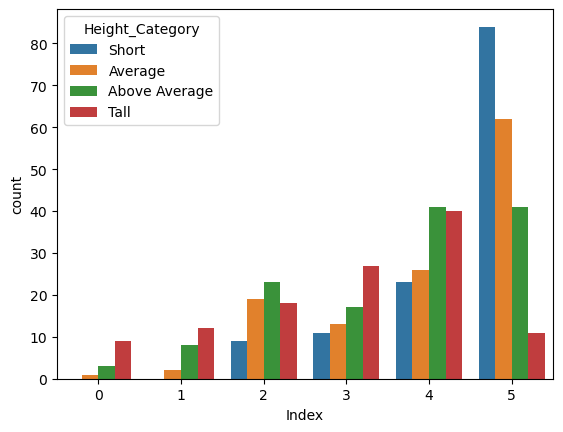

In [97]:
# Plot the count of BMI index values 
sns.countplot(data=bmi, x='Index', hue='Height_Category')
plt.show()

It looks like most short people in our dataset fall into the obese and extremely obese categories.

### 4.3 Generating hypotheses

#### What is true?

When performing EDA, the question we should ask is how do we know what we are observing is true?

* Would data from a different time period give the same results?

* To make conclusions regarding relationships, differences, and patterns in our data:
    * We use **Hypotheses Testing**

* Hypotheses testing requires, prior to data collection:
    * Generating a hypothesis or question
    * A decision on what statistical test will be used to   
    reasonably conclude whether the hypothesis was true or false

#### Generating hypotheses

Exploratory data analysis is a crucial step in generating hypotheses.

#### Exercise: Comparing salaries

An idea you'd like to explore is - do data professionals get paid more in the USA than they do in   
Great Britain?  

Subset the data by `Employee_Location` and produce a plot displaying the average salary between the two  
groups.

In [98]:
# Import dataset
salaries = pd.read_csv('datasets/ds_salaries_clean.csv')
salaries.head(3)

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0


In [99]:
# Filter for employees in the US or GB
usa_and_gb = salaries[salaries['Employee_Location'].isin(['US', 'GB'])]
usa_and_gb['Employee_Location'].value_counts()

Employee_Location
US    332
GB     44
Name: count, dtype: int64

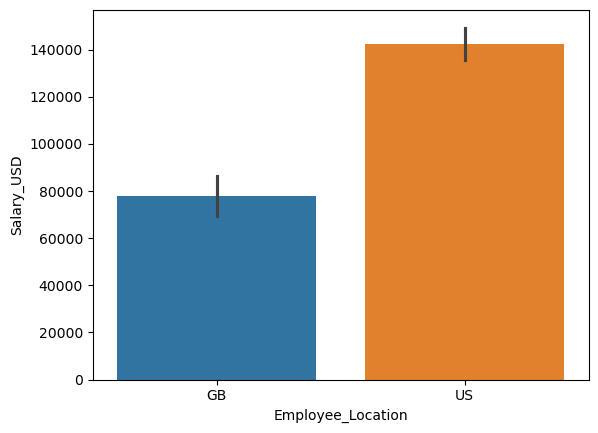

In [100]:
# Create a barplot of salaries by location
sns.barplot(data=usa_and_gb, x='Employee_Location', y='Salary_USD', hue='Employee_Location')
plt.show()

The visualization suggests we have generated a hypothesis that is worth formally investigating to   
determine whether a real difference exists or not.

#### Exercise: Choosing a hypotheses

Visualizations can be used to generate hypotheses, making them a crucial part of exploratory data  
analysis.

Generate a bar plot to inspect how salaries differ based on company size and employment status. For  
reference there are four values:

| **Value** | **Meaning** |
|-----------|-------------|
| CT        | Contractor  |
| FL        | Freelance   |
| PT        | Part-time   |
| FT        | Full-time   |

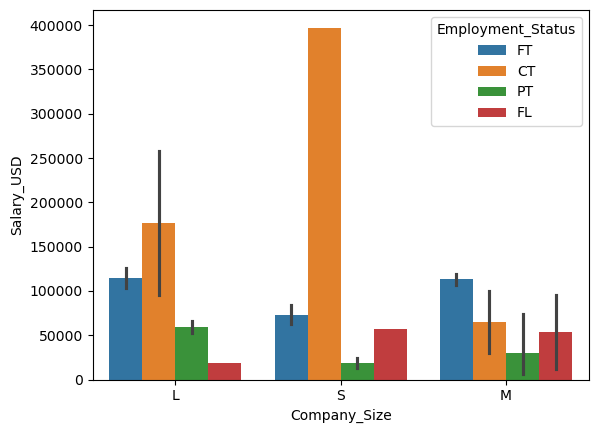

In [101]:
# Create a bar plot of salary versus company size, factoring in employment status
sns.barplot(data=salaries, x='Company_Size', y='Salary_USD', hue='Employment_Status')
plt.show()

What is a reasonable hypothesis to generate based on this plot?  

Contractors appear to be paid more by small companies on average based on the data, so this is a   
reasonable hypothesis.

#### Next steps

Next, we need to design an experiment to test our hypothesis.

This process involves many steps which are outside the scope of this course.

<div style="text-align: center; font-size: 18px; font-weight: bold; color: #F5DEB3;">
<span>[ End of notebook ]</span>
</div>